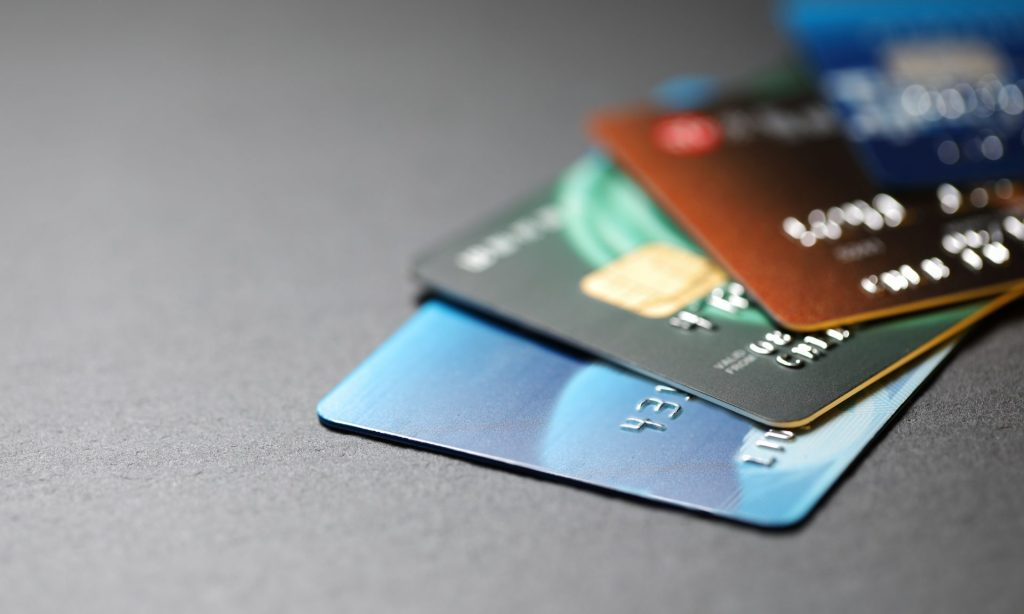

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

* [1. Project Introduction](#1)
* [2. Pre-Processing](#2)
    * [2.1 Librarie](#2.1)
    * [2.2 Data Loading](#2.2)
        * [2.2.1 Data Description](#2.2.1)
    * [2.3 Data Check](#2.3)
* [3. Exploratory Data Analysis(EDA)](#3)
    * [3.1 Categorcial Data Visualization](#3.1)
        * [3.1.1 Churn Status/Attrition_Flag](#3.1.1)
        * [3.1.2 Gender](#3.1.2)
        * [3.1.3 Marital Status](#3.1.3)
        * [3.1.4 Education Level](#3.1.4)
        * [3.1.5 Income](#3.1.5)
        * [3.1.6 Card Category](#3.1.6)
    * [3.2 Numercial Data Visualization](#3.2)
        * [3.2.1 Age](#3.2.1)
        * [3.2.2 Number of products held by customer](#3.2.2)
        * [3.2.3 Number of dependents of customer](#3.2.3)
        * [3.2.4 Number of months with no transactions in the last year.](#3.2.4)
        * [3.2.5 Credit limit](#3.2.5)
        * [3.2.6 Months of account](#3.2.6)
        * [3.2.7 Revolving balance on the credit card.](#3.2.7)
        * [3.2.8 Number of transactions made in last year](#3.2.8)
        * [3.2.9 Amount of transactions made in last year](#3.2.6)
        * [3.2.10 Change in transaction number over the last year (Q4 over Q1).](#3.2.10)
    * [3.3 Pearson Correlation & Spearman Correlation](#3.3)
* [4. Classification Model](#4)
    * [4.1 Training Model in  RAW Dataset](#4.1)
        * [4.1.1 RandomForest Classifier](#4.1.1)
        * [4.1.2 Support Vector Machine](#4.1.2)
        * [4.1.3 Gradient Boosting](#4.1.3)
    * [4.2 SMOTE](#4.2)
    * [4.3 Cross-validation](#4.3)
    * [4.4 Training Model in Upsample Dataset](#4.4)
        * [4.4.1 RandomForest Classifier](#4.4.1)
        * [4.4.2 Support Vector Machine](#4.4.2)
        * [4.4.3 Gradient Boosting](#4.4.3)
    * [4.5 Tunning parameters](#4.5)
        * [4.5.1 RandomizedSearchCV](#4.5.1)
        * [4.5.2 GridSearchCV](#4.5.2)
    * [4.6 Feature Selection](#4.6)
* [5 Conclusion](#5)


# Project Introduction<a id = "1" ></a>

"A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

This dataset from a website with the URL as https://leaps.analyttica.com/home. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 23 features."     


--Sakshi Goyal(Dataset uploader)



In this kernel, we will

* Data set cleaning & exploration
* Dealing with unbalanced data
* Compare the performance of machine learning models on two data sets.
* Tunning parameters

# 2. Pre-Processing<a id = "2" ></a>

# 2.1 Libraries<a id = "2.1" ></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.figure_factory as ff
from plotly.offline import plot,iplot,download_plotlyjs

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf

cf.set_config_file(sharing='public',theme='white',offline=True)

import plotly.io as pio
pio.renderers.default = 'colab'

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,f1_score,precision_score,confusion_matrix

from sklearn.pipeline import Pipeline

# 2.2 Data loading<a id = "2.2" ></a>

In [ ]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
df

# 2.2.1 Data description<a id = "2.2.1" ></a>

1. CLIENTNUM - ID of the customer holding the credit card.

2. Customer_Age - Age of the customer.

3. Gender - Sex of the customer.

4. Dependent_count - Number of dependents of the customer.

5. Education_Level - Educational qualification of the customer.

6. Marital_Status - Civil status of the customer.

7. Income_Category - Annual income range of the customer.

8. Card_Category - Type of card owned by the customer.

9. Months_on_book - Number of months elapsed since the account opening.

10. Total_Relationship_Count - Total number of products held by the customer.

11. Months_Inactive_12_mon - Number of months with no transactions in the last year.

12. Contacts_Count_12_mon - Number of contacts with the bank in the last year.

13. Credit_Limit - Credit limit on the credit card.

14. Total_Revolving_Bal - Total revolving balance on the credit card.

15. Avg_Open_To_Buy - Average card "Open To Buy" (=credit limit - account balance) in the last year.

16. Total_Amt_Chng_Q4_Q1 - Change in transaction amount over the last year (Q4 over Q1).

17. Total_Trans_Amt - Total amount of transactions made in the last year.

18. Total_Trans_Ct - Number of transactions made in the last year.

19. Total_Ct_Chng_Q4_Q1 - Change in transaction number over the last year (Q4 over Q1).

20. Avg_Utilization_Ratio - Average card "Utilization ratio" (=account balance / credit limit) in the last year.

21. Navie Bayes

22. Navie Bayes

23. Attrition_Flag - Target variable. "Attrited Customer" if the customer closed their account, otherwise "Existing Customer".

#  2.3 Data Checking<a id = '2.3'><a>


> **Any data must be checked for missing values first.**

Ensuring the quality of the data set greatly affects the performance of the model.


> The filling method should be judged on the **Real-world Business Scenario.**

* Filling methods：
    *   Default value
    *   Mean value
    *   Mode
    *   KNN filling
    *   Predicting through the model(Random Forest) as label




In [ ]:
df.isnull().sum()

Fortunately, we don't have a null value.


According to the data set description, delete the 21 and 22 columns of Naive_Bayes_Classifier

In [ ]:
df1 = df.iloc[:, :-2]
df1.info()

# 3. Exploratory Data Analysis(EDA)<a id = "3"><a>

1. Categorical data visualization
2. Numerical data visualization
3. Pearson & Spearman correlation coefficient

Check the data structure of Dataset.
There are 20 columns in this dataset. 
We need to know which data attributes are numerical and which data attributes are categorical.

In [ ]:
Numbercial_features= df1.select_dtypes(include=['float64','int64'])
Numbercial_features.sample()

In [ ]:
Categorical_features = df1.select_dtypes(exclude=['float64','int64'])
Categorical_features.sample()

Categorcial Data:


Attrition_Flag, 
Gender, 
Education_Level, 
Marital_Status, 
Income_Category and Card_Category.

All the remaining data are numerical values.

# 3.1 Cegorcial Data visualization<a id = '3.1'><a>


# Churn Status/Attrition_Flag <a id ="3.1.1"><a>

In [ ]:
fig = px.pie(df1,names='Attrition_Flag',title='Percentage of Existing and Attrited Customers',hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
print('Total number of customers:',df1['Attrition_Flag'].count())
print(df1['Attrition_Flag'].value_counts())

We can see the length of Attrited Customers is 1627 which means there are 1627 Attrited customers in the dataset. And the length of existing customers is 8500 which means there are 8500 existing customers in the dataset. obviously, this is an unbalanced dataset.

# Gender<a id = "3.1.2"><a>

In [ ]:
Gender = sns.countplot(x = 'Gender',hue = 'Attrition_Flag',data=df1,palette='Set2')
Gen_att = df1.loc[df1['Attrition_Flag']=='Attrited Customer','Gender']
Gen_ex = df1.loc[df1['Attrition_Flag']=='Existing Customer','Gender']
print('Gender of Attrited customer:\n',Gen_att.value_counts())
print('-----------------------------------------------------------')
print('Gender of Existing customer:\n',Gen_ex.value_counts())
print('-----------------------------------------------------------')
print('Gender of Total customer:\n',df1.Gender.value_counts())

# Marital Status <a id = "3.1.3"><a>


In [ ]:
Mar_att = df1.loc[df1['Attrition_Flag']=='Attrited Customer','Marital_Status']
Mar_ex = df1.loc[df1['Attrition_Flag']=='Existing Customer','Marital_Status']
print('Marital status of Attrited customer:\n',Mar_att.value_counts())
print('-----------------------------------------------------------')
print('Marital status of Existing customer:\n',Mar_ex.value_counts())
print('-----------------------------------------------------------')
print('Marital status of Total customer:\n',df1.Marital_Status.value_counts())

In [ ]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Customer','Existing Customers','Attrited Customers','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=df1.Marital_Status.value_counts().values,
           labels=['Married ','Single ','Unknow', 'Divorced'],
           pull=[0,0.01,0.03,0.03],
           hole=0.3),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=['Married ', 'Single ','Divorced', 'Unknown'],
        values=df1.query('Attrition_Flag=="Existing Customer"').Marital_Status.value_counts().values,
        pull=[0,0.01,0.05,0.05],
        hole=0.3),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        labels=['Married ', 'Single','Unknown ','Divorced '],
        values=df1.query('Attrition_Flag=="Attrited Customer"').Marital_Status.value_counts().values,
        pull=[0,0.01,0.05,0.05],
        hole=0.3),
    row=2, col=2
)



fig.update_layout(
    height=700,
    showlegend=True,
    title_text="<b>Martial Status<b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The interesting point is that nearly 39% of customers are single.

# Education Level<a id = "3.1.4"><a>

In [ ]:
Edu_att = df1.loc[df1['Attrition_Flag']=='Attrited Customer','Education_Level']
Edu_ex = df1.loc[df1['Attrition_Flag']=='Existing Customer','Education_Level']
print('Education Level of Attrited customer:\n',Edu_att.value_counts())
print('-----------------------------------------------------------')
print('Education Level of Existing customer:\n',Edu_ex.value_counts())
print('-----------------------------------------------------------')
print('Education Level of Total customer:\n',df1.Education_Level.value_counts())

In [ ]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Customer','Existing Customers','Attrited Customers','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=df1.Education_Level.value_counts().values,
           labels=['Graduate ','Hight School','Unknown','Uneducated','College','Post-Graduate','Doctorate'],
           pull=[0,0.01,0.03,0.03],
           hole=0.3),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=df1.query('Attrition_Flag=="Existing Customer"').Education_Level.value_counts().values,
        labels=['Graduate ','Hight School','Unknown','Uneducated','College','Post-Graduate','Doctorate'],
        pull=[0,0.01,0.05,0.05],
        hole=0.3),
    row=1, col=2
)

fig.add_trace(
    go.Pie(values=df1.query('Attrition_Flag=="Attrited Customer"').Education_Level.value_counts().values,
        labels=['Graduate ','Hight School','Unknown','Uneducated','College','Doctorate','Post-Graduate'],
        pull=[0,0.01,0.05,0.05],
        hole=0.3),
    row=2, col=2
)



fig.update_layout(
    height=700,
    showlegend=True,
    title_text="<b>Education Level<b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

From the level of education, we can conclude that if unknown is defined as uneducated, We can state that 70% of our customers have received formal education, and 30% of them have received higher education. Only 10% of the customers are postgraduate and doctors.

# Income<a id = "3.1.5"><a>

In [ ]:
Income_att = df1.loc[df1['Attrition_Flag']=='Attrited Customer','Income_Category']
Income_ex = df1.loc[df1['Attrition_Flag']=='Existing Customer','Income_Category']
print('Income of Attrited customer:\n',Income_att.value_counts())
print('-----------------------------------------------------------')
print('Income of Existing customer:\n',Income_ex.value_counts())
print('-----------------------------------------------------------')
print('Income of Total customer:\n',df1.Income_Category.value_counts())

In [ ]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Customer','Existing Customers','Attrited Customers','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=df1.Income_Category.value_counts().values,
           labels=['Less than $40k ','$40k - $60k','$80k - $120k','$60k - $80k','Unknown','$120k +'],
           pull=[0,0.01,0.03,0.03],
           hole=0.3),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=Income_ex.value_counts().values,
        labels=['Less than $40k ','$40k - $60k','$80k - $120k','$60k - $80k','Unknown','$120k +'],
        pull=[0,0.01,0.05,0.05],
        hole=0.3),
    row=1, col=2
)

fig.add_trace(
    go.Pie(values=Income_att.value_counts().values,
        labels=['Less than $40k ','$40k - $60k','$80k - $120k','$60k - $80k','Unknown','$120k +'],
        pull=[0,0.01,0.05,0.05],
        hole=0.3),
    row=2, col=2
)



fig.update_layout(
    height=700,
    showlegend=True,
    title_text="<b>Income_Category<b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Approximately 35%  of customers' income is less than 40K annual salary.

# Card Category<a id = "3.1.6"><a>

In [ ]:
fig = px.pie(df1,names='Card_Category',title='Percentage of Card type',hole=0.3)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()
print('Total number of customers:',df1['Card_Category'].count())
print(df1['Card_Category'].value_counts())

# 3.2 Numercial Data visualization<a id ="3.2"><a>


1.   Age
2.   Number of products held by customer

1.   Number of dependents of customer
2.   Number of months with no transactions in the last year.

1.   Credit limit
2.   Months of account

1.   Revolving balance on the credit card.

1.   Amount of transactions made in last year
2.   Number of transactions made in last year

1.   Change in transaction number over the last year (Q4 over Q1).

# Age <a id ="3.2.1"><a>

In [ ]:
####Let us view the age distribution.
Age_att = df1.loc[df1['Attrition_Flag']=='Attrited Customer','Customer_Age']
Age_exi = df1.loc[df1['Attrition_Flag']=='Existing Customer','Customer_Age']
Total_Age = pd.concat([Age_exi,Age_att],axis=1)
Total_Age.columns=['Existing Customer','Attrited Customer']
Total_Age

In [ ]:
Total_Age.iplot(kind='hist', keys=['Attrited Customer', 'Existing Customer'],
           colors=['grey', 'red'], histnorm='percent', opacity=0.5, bins=40,
           title='Customers\' age', xTitle='Age', yTitle='% customers')

We can see The distribution of customer age conforms to the normal distribution.

# Number of products held by customer<a id ="3.2.2"><a>

In [ ]:
fig = px.box(df, color="Attrition_Flag", y="Total_Relationship_Count",title='Number of products held by customer', points="all")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Relationship_Count", color="Attrition_Flag",title='Number of products held by customer')
fig.show()

# Number of dependents of customer<a id ="3.2.3"><a>

In [ ]:
fig = px.box(df, color="Attrition_Flag", y="Dependent_count", points="all",title='Number of dependents of the customer')
fig.show()

In [ ]:
fig = px.histogram(df, x="Dependent_count", color="Attrition_Flag",title='Number of dependents of the customer')
fig.show()

# Number of months with no transactions in the last year<a id ="3.2.4"><a>

In [ ]:
fig = px.box(df, color="Attrition_Flag", y="Months_Inactive_12_mon", points="all",title='Number of months with no transactions in the last year')
fig.show()

In [ ]:
fig = px.histogram(df, x="Months_Inactive_12_mon", color="Attrition_Flag",title='Number of months with no transactions in the last year')
fig.show()

# Credit limit<a id ="3.2.5"><a>

In [ ]:
fig = px.box(df, color="Attrition_Flag", y="Credit_Limit", points="all",title='Credit limit on the credit card')
fig.show()

In [ ]:
fig = px.histogram(df, x="Credit_Limit", color="Attrition_Flag",title='Credit limit on the credit card')
fig.show()

# Months of account<a id ="3.2.6"><a>

In [ ]:
fig = px.box(df,color="Attrition_Flag", y="Months_on_book", points="all",title='Number of months since account opening')
fig.show()

In [ ]:
fig = px.histogram(df, x="Months_on_book", color="Attrition_Flag",title='Number of months since account opening')
fig.show()

# Revolving balance on the credit card<a id ="3.2.7"><a>

In [ ]:
fig = px.box(df, color="Attrition_Flag", y="Total_Revolving_Bal", points="all",title='Total revolving balance on the credit card')
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Revolving_Bal", color="Attrition_Flag",title='Total revolving balance on the credit card')
fig.show()

# Number of transactions made in last year<a id ="3.2.8"><a>

In [ ]:
df1.sample()

In [ ]:
fig = fig = px.box(df, color="Attrition_Flag", y="Total_Trans_Ct", points="all",title='Number of transactions made in the last year')
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Trans_Ct", color="Attrition_Flag",title='Number of transactions made in the last year')
fig.update()
fig.show()

# Amount of transactions made in last year<a id ="3.2.9"><a>

In [ ]:
fig = fig = px.box(df, color="Attrition_Flag", y="Total_Trans_Amt", points="all",title='Total amount of transactions made in the last year')
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Trans_Amt", color="Attrition_Flag",title='Total amount of transactions made in the last year')
fig.show()

# Change in transaction number over the last year (Q4 over Q1)<a id ="3.2.10"><a>

In [ ]:
fig = fig = px.box(df, color="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", points="all",title='Change in transaction number over the last year (Q4 over Q1)')
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1", color="Attrition_Flag",title='Change in transaction number over the last year (Q4 over Q1)')
fig.show()

# 3.3 Pearson Correlation & Spearman Correlation<a id = "3.3"><a>


The value range of Pearson's correlation coefficient is [-1, 1]:


*   When it is close to 1, it means that the two have a strong positive correlation.
*   When it is close to -1, it indicates that there is a strong negative correlation.

*   And if the value is close to 0, it means that the correlation or variable is not linearly related. But when R=0, we have to pay attention to another non-linear dependency, which can be checked with spearman coefficient.


We need to convert qualitative variables into quantitative variables at the very beginning.

In [ ]:
#Convert the target value to 1,0

df1.Attrition_Flag = df1.Attrition_Flag.replace({'Existing Customer':0,'Attrited Customer':1})
df1.Gender = df1.Gender.replace({'M':0,'F':1})
print("# existing customers: {}\n".format(len(df.loc[df1['Attrition_Flag']  == 0])))
print("# attrited customers: {}\n".format(len(df.loc[df1['Attrition_Flag']  == 1])))


>   Obviously, this is an unbalanced data set. We will then upsample the original data to obtain a balanced data set.



>   Through the previous data exploration and visualization, there is no missing vaule in this data, but some values in categorical data are Unknown. To some extent, 'Unknown' can be defined as missing values.

>   For the 'Unknown' class processing depends on the actual business scenario. Sometimes it is possible to make 'Unknown' into a new class.

> But in this data set, we simply delete the 'Unknown' value.







In [ ]:
#convert all categorcial features to numerical
df1 = pd.concat([df1,pd.get_dummies(df1['Education_Level']).drop(columns = ['Unknown'])],axis= 1)
df1 = pd.concat([df1,pd.get_dummies(df1['Marital_Status']).drop(columns = ['Unknown'])],axis= 1)
df1 = pd.concat([df1,pd.get_dummies(df1['Income_Category']).drop(columns = ['Unknown'])],axis= 1)
df1 = pd.concat([df1,pd.get_dummies(df1['Card_Category'])],axis= 1)
#Delete redundant columns
df1.drop(columns= ['Education_Level','Marital_Status','Income_Category','Card_Category','CLIENTNUM'],inplace= True)

In [ ]:
df1.head()

In [ ]:
df1_spearman_correlation = df1.corr(method='pearson')

fig = go.Figure(data=go.Heatmap(
                   x=df1_spearman_correlation.columns,
                   y=df1_spearman_correlation.index,
                   z=df1_spearman_correlation.values,
                   name='pearson',showscale=True,xgap=1,ygap=1,
                   colorscale='Blackbody'))
fig.update_layout(height=700, width=900, title_text="<b>Pearson Correlation<b>")
fig.show()

In [ ]:
df1_spearman_correlation = df1.corr(method='spearman')

fig = go.Figure(data=go.Heatmap(
                   x=df1_spearman_correlation.columns,
                   y=df1_spearman_correlation.index,
                   z=df1_spearman_correlation.values,
                   name='spearman',showscale=True,xgap=1,ygap=1,
                   colorscale='Blackbody'))
fig.update_layout(height=700, width=900, title_text="<b>Spearman Correlations<b>")
fig.show()

Through the heat map, we can find that Arrition_Flag is related to the following features: 
* Total_Trans_Ct(-0.37)
* Total_CT_Chang_Q4_Q1(-0.29)
* Avg_Utilization_Ratio(-0.24)
* Total_Revolving_Bal(-0.24)
* Total_Trans_Amt(-0.22)

Let us pay attention to these characteristics, but this does not mean that they are causally related to the target vaule.

Meanwhile, we noticed that the following features have very weak correlation coefficients:
* Months_on_book(0.015)
* Customer_Age(0.017)
* Dependent_Count(0.021)
* Avg_Open_To_Buy(0.027)
* Gender(0.037)


The correlation between Credit limit and Avg_Open_To_Buy is close to 1 (0.99).
This means that these two features are strongly correlated. Usually we can remove one of them and keep the feature with the larger Pearson coefficient of the target vaule.

The correlation coefficient of Customer age and Months On_book is 0.79, which belongs to the category of strong relationship [0.6-0.8].

The correlation coefficient of Total_Trans_Ct and Total_Trans_Amt is 0.88, which belongs to the category of extremely strong relationship [0.8-1.0].

# 4. Classification Model<a id ="4"><a>


1.  Training Model in  RAW Dataset
2.  SMOTE
3.  Cross-validation
4.  Training Model in Upsample Dataset
5. Tunning parameters
6.  Feature Selection

Experimental algorithm:
*   Random Forest
*   Support Vector Machine
*   Gradient Boosting

Compare the performance of algorithms on **raw data** and **up-sampled data**.

# 4.1 Training Model in RAW Dataset<a id = "4.1"><a>

In [ ]:
x_RAW = df1[df1.columns[1:]]
y_RAW = df1['Attrition_Flag']
x_train_RAW,x_test_RAW,y_train_RAW,y_test_RAW = train_test_split(x_RAW,y_RAW,test_size = 0.2,random_state =42)

In [ ]:
SC = StandardScaler()
x_train_RAW = SC.fit_transform(x_train_RAW)
x_test_RAW = SC.fit_transform(x_test_RAW)

# RandomForest Classifier<a id = "4.1.1"><a>

In [ ]:
RF_RAW = RandomForestClassifier()
RF_RAW.fit(x_train_RAW,y_train_RAW)

In [ ]:
RF_RAW_pre = RF_RAW.predict(x_test_RAW)

In [ ]:
sns.heatmap(confusion_matrix(y_test_RAW,RF_RAW_pre), annot=True)
plt.show()

In [ ]:


RF_RAW_fpr, RF_RAW_tpr, RF_RAW_thresholds = metrics.roc_curve(y_test_RAW, RF_RAW_pre)
RF_RAW_AUC = metrics.auc(RF_RAW_fpr, RF_RAW_tpr)
print('Random Forest Classifier : \n', classification_report(RF_RAW_pre, y_test_RAW))
fig = px.area(
    x=RF_RAW_fpr, y=RF_RAW_tpr,
    title='AUC of RandomForest on RAW Data:'' %0.4f'% RF_RAW_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Support Vector Machine<a id = "4.1.2"><a>

In [ ]:
SVM_RAW = Pipeline(steps =[("RF",SVC(random_state=42,kernel='rbf'))])
SVM_RAW.fit(x_train_RAW,y_train_RAW)

In [ ]:
SVM_RAW_pre = SVM_RAW.predict(x_test_RAW)
sns.heatmap(confusion_matrix(y_test_RAW,SVM_RAW_pre), annot=True)
plt.show()

In [ ]:
SVM_RAW_fpr, SVM_RAW_tpr, SVM_RAW_thresholds = metrics.roc_curve(y_test_RAW, SVM_RAW_pre)
SVM_RAW_AUC = metrics.auc(SVM_RAW_fpr, SVM_RAW_tpr)
print('Support Vector Machine : \n', classification_report(SVM_RAW_pre, y_test_RAW))

fig = px.area(
    x=SVM_RAW_fpr, y=SVM_RAW_tpr,
    title='AUC of SVM on RAW Data:'' %0.4f'% SVM_RAW_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Gradient Boosting<a id = "4.1.3"><a>

In [ ]:
GBoost_RAW = Pipeline(steps=[('RF',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42))])

In [ ]:
GBoost_RAW.fit(x_train_RAW,y_train_RAW)

In [ ]:
GBoost_RAW_pre = GBoost_RAW.predict(x_test_RAW)

In [ ]:
 sns.heatmap(confusion_matrix(y_test_RAW,GBoost_RAW_pre), annot=True)
 plt.show()

In [ ]:
GBoost_RAW_fpr, GBoost_RAW_tpr, GBoost_RAW_thresholds = metrics.roc_curve(y_test_RAW, GBoost_RAW_pre)
GBoost_RAW_AUC = metrics.auc(GBoost_RAW_fpr, GBoost_RAW_tpr)
print('Gradient Boosting Classifier : \n', classification_report(GBoost_RAW_pre, y_test_RAW))

fig = px.area(
    x=GBoost_RAW_fpr, y=GBoost_RAW_tpr,
    title='AUC of GBoost on RAW Data:'' %0.4f'% GBoost_RAW_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

For models trained on unbalanced data sets, we can only consider AUC as a performance indicator.

From the AUC of the models:
*   RandomFroest = 0.8733
*   Support Vector Machine = 0.7692
*   Gradient Boosting = 0.8975


# 4.2 SMOTE<a id ="4.2"><a>

 There are currently two popular methods for sampling minority categories:

*  (i) Synthetic Minority Oversampling Technique (SMOTE).
*  (ii) Adaptive Synthetic (ADASYN).



> An improved algorithm of SOMTE is used here: BoderlineSMOTE.

* SMOTE: For the minority sample A, randomly select a nearest neighbor sample B, and then randomly select a point C from the line between A and B as the new minority sample.

* BoderlineSMOTE: All minority sample points are divided into three categories: 1) noise, that is, all nearby points are heterogeneous samples. 2) In danger, at least half of the nearby points are samples of the same kind. 3) Safe points, all nearby points are samples of the same kind. Then uniformly use the second-class in danger minority samples to generate data points.





In [ ]:
df1.head()

In [ ]:
x= df1[df1.columns[1:]]
y = df1['Attrition_Flag']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)  

In [ ]:
#standaration of data
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

We only upsample the training set of 80% of the original data to ensure that the model has not seen the remaining 20% of the data to avoid overfitting problems.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE()
x_SM, y_SM = sm.fit_resample(x_train, y_train)

In [ ]:
#Check the result of SMOTE
from collections import Counter
print(Counter(y_train))
print(Counter(y_SM))

In [ ]:
SM_x = np.concatenate((x_SM, x_test))
SM_y = np.concatenate((y_SM, y_test))
feature_names = list(df1.drop('Attrition_Flag', axis=1).columns)

In [ ]:
#Store the balanced data in a new dataframe.
sm_df = pd.DataFrame(np.column_stack([SM_y, SM_x]), columns=['Attrition'] + feature_names)
sm_df.head()

# 4.3 Cross-validation<a id ="4.3"><a>

In [ ]:
RF_SMOTE = RandomForestClassifier()
SVM_SMOTE = Pipeline(steps =[("RF",SVC(random_state=42,kernel='rbf'))])
GBoost_SMOTE = Pipeline(steps=[('RF',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42))])

In [ ]:
# K-fold = 10
RF_SMOTE_Cross_validation_scores = cross_val_score(RF_SMOTE,x_SM,y_SM,cv= 10,scoring='f1')
SVM_SMOTE_Cross_validation_scores = cross_val_score(SVM_SMOTE,x_SM,y_SM,cv= 10,scoring='f1')
GBoost_SMOTE_Cross_validation_scores = cross_val_score(GBoost_SMOTE,x_SM,y_SM,cv= 10,scoring='f1')

In [ ]:
x_axix = [x for x in range(10)] 
plt.title('Compare F1 score of Cross-validation each model')
plt.plot(x_axix, RF_SMOTE_Cross_validation_scores, color='green', label='Random Forest F1')
plt.plot(x_axix, SVM_SMOTE_Cross_validation_scores,  color='skyblue', label='SVM F1')
plt.plot(x_axix, GBoost_SMOTE_Cross_validation_scores, color='blue', label='Gradient Boosting F1')
plt.legend()

plt.xlabel('iteration times')
plt.ylabel('F1 score')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

> We can conclude from the 10-fold cross-validation that the performance of random forest on this data set is better than SVM and Gradient Boosting. 


> But is this the case? Let's train and test the model on the upsample data set.





# 4.4 Traning Model in Upsample Dataset<a id = "4.4"><a>

# RandomForest Classifier<a id ="4.4.1"><a>

In [ ]:
RF_SMOTE.fit(x_SM,y_SM)

In [ ]:
RF_SMOTE_pre = RF_SMOTE.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

RF_SMOTE_fpr, RF_SMOTE_tpr, RF_SMOTE_thresholds = metrics.roc_curve(y_test, RF_SMOTE_pre)
RF_SMOTE_AUC = metrics.auc(RF_SMOTE_fpr, RF_SMOTE_tpr)
print('Random Forest Classifier : \n', classification_report(RF_SMOTE_pre, y_test))
fig = px.area(
    x=RF_SMOTE_fpr, y=RF_SMOTE_tpr,
    title='AUC of RandomForest on Upsample Data:'' %0.4f'% RF_SMOTE_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Support Vector Machine<a id = "4.4.2"><a>

In [ ]:
SVM_SMOTE.fit(x_SM,y_SM)

In [ ]:
SVM_SMOTE_pre = SVM_SMOTE.predict(x_test)

In [ ]:
SVM_SMOTE_fpr, SVM_SMOTE_tpr, SVM_SMOTE_thresholds = metrics.roc_curve(y_test, SVM_SMOTE_pre)
SVM_SMOTE_AUC = metrics.auc(SVM_SMOTE_fpr, SVM_SMOTE_tpr)
print('Support Vector Machine : \n', classification_report(SVM_SMOTE_pre, y_test))

fig = px.area(
    x=SVM_SMOTE_fpr, y=SVM_SMOTE_tpr,
    title='AUC of SVM on Upsample Data:'' %0.4f'% SVM_SMOTE_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# Gradient Boosting<a id ="4.4.3"><a>

In [ ]:
GBoost_SMOTE.fit(x_SM,y_SM)

In [ ]:
GBoost_SMOTE_pre = GBoost_SMOTE.predict(x_test)

In [ ]:
GBoost_SMOTE_fpr, GBoost_SMOTE_tpr, GBoost_SMOTE_thresholds = metrics.roc_curve(y_test, GBoost_SMOTE_pre)
GBoost_SMOTE_AUC = metrics.auc(GBoost_SMOTE_fpr, GBoost_SMOTE_tpr)
print('Gradient Boosting Classifier : \n', classification_report(GBoost_SMOTE_pre, y_test))

fig = px.area(
    x=GBoost_SMOTE_fpr, y=GBoost_SMOTE_tpr,
    title='AUC of GBoost on Upsample Data:'' %0.4f'% GBoost_SMOTE_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

For models trained on upsample data sets, 

From the AUC of the models:
*   RandomFroest = 0.9312
*   Support Vector Machine = 0.8611
*   Gradient Boosting = 0.8787


We can see the different AUC of each model after the Traning model in the upsampling dataset. 

Interestingly, except for Gradient boosting, the other two algorithms have improved.


# 4.5 Tunning parameters<a id = "4.5"><a>



1.   RandomizedSearchCV
2.   GridSearchCV



# RandomizedSearchCV<a id ="4.5.1"><a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix

# Number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
#rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_SM, y_SM)
#print(rf_random.best_params_)

In [ ]:
RF_opt= RandomForestClassifier(n_estimators=1800, min_samples_split=2, min_samples_leaf=1, 
                            max_features='auto', max_depth=20, bootstrap=False)
RF_opt.fit(x_SM,y_SM)
RF_opt_pre=RF_opt.predict(x_test)
print('Random Forest Classifier (Optimized)')
rf_opt=plot_confusion_matrix(RF_opt, x_test, y_test)

In [ ]:
RF_opt_fpr, RF_opt_tpr, RF_opt_thresholds = metrics.roc_curve(y_test, RF_opt_pre)
RF_opt_AUC = metrics.auc(RF_opt_fpr, RF_opt_tpr)
print('Random Forest Classifier : \n', classification_report(RF_opt_pre, y_test))

fig = px.area(
    x=RF_opt_fpr, y=RF_opt_tpr,
    title='AUC of Random Forest (Optimized):'' %0.4f'% RF_opt_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# GridSearchCV<a id = "4.5.2"><a>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1.0,
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8
                                                               ,max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)
gsearch1.fit(x_SM,y_SM)
print(gsearch1.best_params_)

In [ ]:
GB_opt=GradientBoostingClassifier(n_estimators=80,learning_rate=1.0,
                                      min_samples_split=500,min_samples_leaf=50,
                                      max_depth=8,max_features='sqrt',
                                      subsample=0.8,random_state=10)
GB_opt.fit(x_SM,y_SM)
GB_opt_pre=GB_opt.predict(x_test)
print('Gradient Boosting (Optimized)')
GB_opt=plot_confusion_matrix(GB_opt, x_test, y_test)

In [ ]:
GB_opte_fpr, GB_opt_tpr, GB_opt_thresholds = metrics.roc_curve(y_test, GB_opt_pre)
GB_opt_AUC = metrics.auc(GB_opte_fpr, GB_opt_tpr)
print('Gradient Boosting Classifier : \n', classification_report(GB_opt_pre, y_test))

fig = px.area(
    x=GB_opte_fpr, y=GB_opt_tpr,
    title='AUC of GBoost (Optimized):'' %0.4f'% GB_opt_AUC,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# 4.6 Feature Selelction<a id = "4.6"><a>
    
According to the form of feature selection, feature selection methods can be divided into three types:

Filter: 
*  Variance  
*  Correlation Coefficient
*  chi-square test.

Wrapper:
*  Recursive feature elimination.

Embedded: 
*  Based on machine learning algorithms and models.

    
We are going to select features in RandomForest way.


In [ ]:
RF_Features = RandomForestClassifier(random_state=1234)
RF_Features.fit(x_SM, y_SM)
RF_Features.feature_importances_

In [ ]:
features_to_plot = 20
importances = RF_Features.feature_importances_
indices = np.argsort(importances)
best_features = np.array(feature_names)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_features

In [ ]:
y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots()
ax.barh(y_ticks, values)
ax.set_yticklabels(best_features)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.show()



We can clearly see that the variables **Total_Trans_Ct**, **Total_Trans_Ams**, **Total_Revolving_Bal**, **Contacts_Count_12_mon,** **Total_Ct_Chng_Q4_Q**1 have high importance in the random forest model. 

But in order to avoid overfitting, we can't just use variables with high importance in the model training process.



# Conclusion<a id ="5"><a>

1. On unbalanced data sets, we can only consider **AUC** as a performance indicator.

*   RandomFroest = 0.8733
*   Support Vector Machine = 0.7692
*   Gradient Boosting = 0.8975

2. On upsample data sets

*   RandomFroest = 0.9315
*   Support Vector Machine = 0.8611
*   Gradient Boosting = 0.8593


We can conclude from the 10-fold cross-validation that the performance of random forest on upsample data set is better than SVM and Gradient Boosting.

After Tunning parameters. (RandomizedSearchCV and GridSearchCV)
*   AUC of Random Forest : 0.9321
*   AUC of Gradient Boosting : 0.8969


After several experiments, we can learn that **RandomForest** may be the best performing model for this data set.

The actual performance of the model is unknown in the real world, because we use SMOTE to adjust the data set.


